In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
df=pd.read_csv('Api.csv')
df

,main/aqi,components/co,components/no,components/no2,components/o3,components/so2,components/pm2_5,components/pm10,components/nh3,dt
0,1,208.62,0.0,0.74,55.08,1.01,1.45,1.45,0.00,1606266000
1,1,208.62,0.0,0.85,54.36,0.92,1.33,1.33,0.01,1606269600
2,1,210.29,0.0,1.01,52.93,0.98,1.36,1.37,0.01,1606273200
3,1,210.29,0.0,1.01,53.64,1.06,1.37,1.37,0.01,1606276800
4,1,208.62,0.0,0.89,55.08,1.10,1.29,1.29,0.01,1606280400
...,...,...,...,...,...,...,...,...,...,...
40389,2,107.03,0.0,0.17,84.19,0.07,2.30,9.87,0.32,1754172000
40390,2,107.42,0.0,0.16,82.90,0.05,2.44,10.43,0.32,1754175600
40391,2,106.64,0.0,0.16,80.85,0.05,2.48,10.46,0.32,1754179200
40392,2,105.51,0.0,0.15,80.14,0.05,2.38,9.98,0.32,1754182800


In [ ]:
df.columns = df.columns.str.replace('components/', '').str.replace('main/', '').str.capitalize()

In [ ]:
df = df[df[(df >= 0)].all(axis=1)]
df

,main/aqi,components/co,components/no,components/no2,components/o3,components/so2,components/pm2_5,components/pm10,components/nh3,dt
5,1,206.95,0.01,0.83,56.51,1.16,1.18,1.19,0.01,1606284000
6,1,206.95,0.02,0.75,57.22,1.25,1.06,1.07,0.01,1606287600
7,1,206.95,0.02,0.70,56.51,1.33,0.92,0.93,0.01,1606291200
8,1,208.62,0.02,0.72,54.36,1.40,0.84,0.84,0.01,1606294800
9,1,210.29,0.02,0.84,50.78,1.34,0.87,0.88,0.01,1606298400
...,...,...,...,...,...,...,...,...,...,...
40377,2,98.97,0.01,0.11,83.19,0.05,5.51,26.00,0.24,1754128800
40378,2,99.04,0.01,0.11,83.23,0.05,5.31,26.14,0.25,1754132400
40379,2,99.06,0.01,0.12,83.28,0.05,5.27,26.35,0.25,1754136000
40380,2,99.59,0.01,0.13,83.14,0.06,5.42,27.44,0.25,1754139600


In [ ]:
df['datetime'] = pd.to_datetime(df['Dt'], unit='s')

/tmp/ipython-input-415759442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['Dt'], unit='s')


In [ ]:
df = df.drop('Dt', axis=1)

In [ ]:
df = df.set_index('datetime')

In [ ]:
df

,Aqi,Co,No,No2,O3,So2,Pm2_5,Pm10,Nh3
datetime,,,,,,,,,
2020-11-25 06:00:00,1,206.95,0.01,0.83,56.51,1.16,1.18,1.19,0.01
2020-11-25 07:00:00,1,206.95,0.02,0.75,57.22,1.25,1.06,1.07,0.01
2020-11-25 08:00:00,1,206.95,0.02,0.70,56.51,1.33,0.92,0.93,0.01
2020-11-25 09:00:00,1,208.62,0.02,0.72,54.36,1.40,0.84,0.84,0.01
2020-11-25 10:00:00,1,210.29,0.02,0.84,50.78,1.34,0.87,0.88,0.01
...,...,...,...,...,...,...,...,...,...
2025-08-02 10:00:00,2,98.97,0.01,0.11,83.19,0.05,5.51,26.00,0.24
2025-08-02 11:00:00,2,99.04,0.01,0.11,83.23,0.05,5.31,26.14,0.25
2025-08-02 12:00:00,2,99.06,0.01,0.12,83.28,0.05,5.27,26.35,0.25


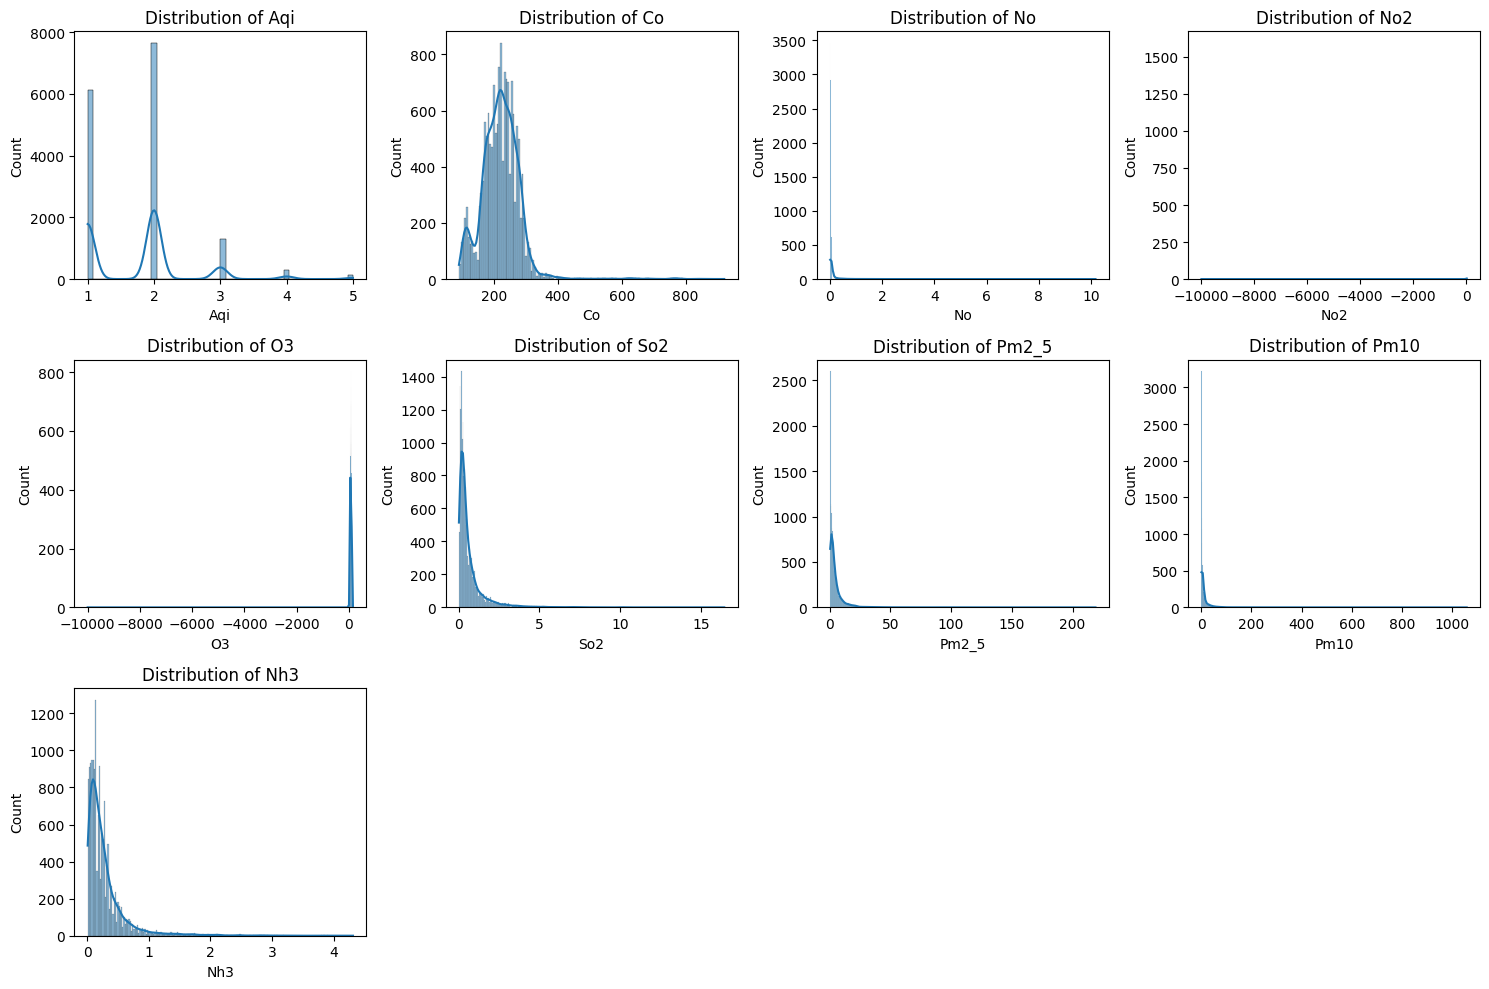

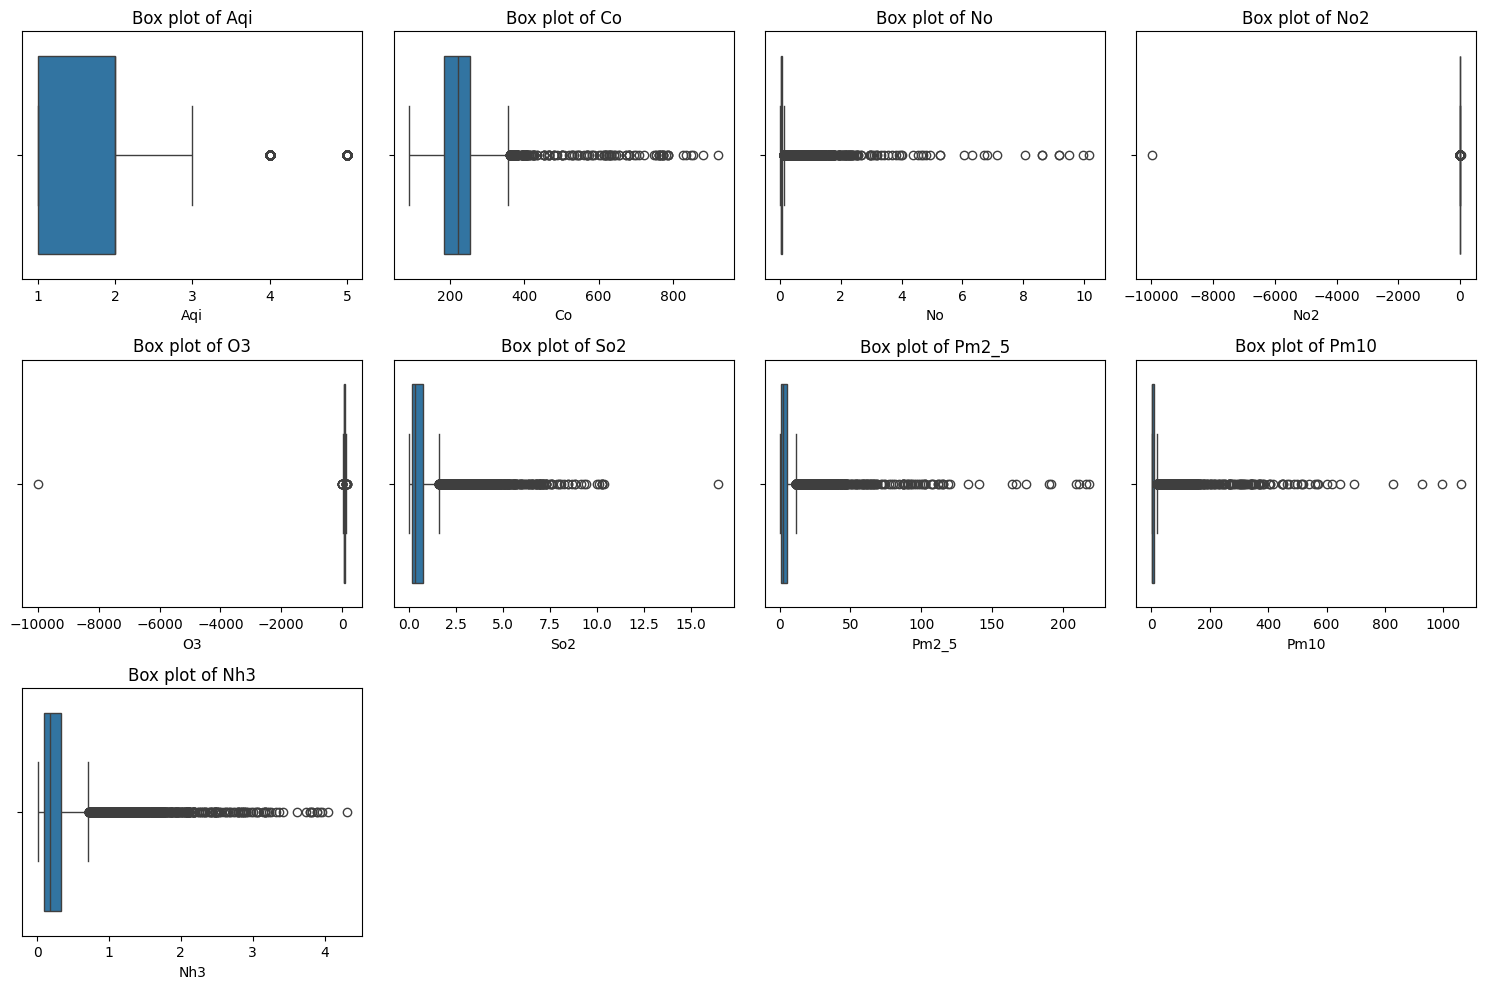

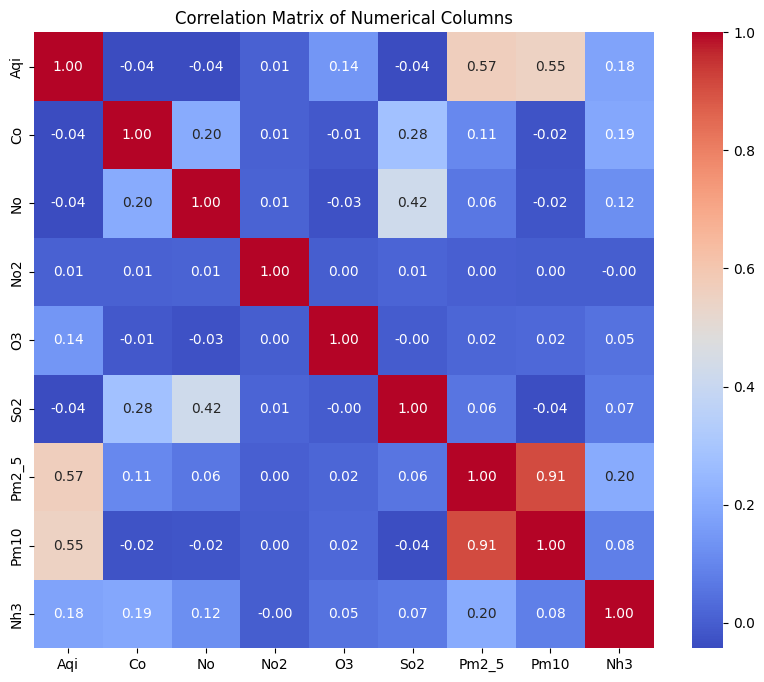

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15462 entries, 2020-11-25 06:00:00 to 2025-08-02 14:00:00
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Aqi                    15462 non-null  int64  
 1   Co                     15462 non-null  float64
 2   No                     15462 non-null  float64
 3   No2                    15462 non-null  float64
 4   O3                     15462 non-null  float64
 5   So2                    15462 non-null  float64
 6   Pm2_5                  15462 non-null  float64
 7   Pm10                   15462 non-null  float64
 8   Nh3                    15462 non-null  float64
 9   Aqi_lag_24h            15438 non-null  float64
 10  Aqi_lag_48h            15414 non-null  float64
 11  Pm2_5_lag_24h          15438 non-null  float64
 12  Co_rolling_mean_24h    15438 non-null  float64
 13  Pm10_rolling_mean_24h  15438 non-null  float64
 14  hour               

In [ ]:
df['Aqi_lag_24h'] = df['Aqi'].shift(24)
df['Aqi_lag_48h'] = df['Aqi'].shift(48)
df.Aqi.shift(-24)
df['Pm2_5_lag_24h'] = df['Pm2_5'].shift(24)
df['Co_rolling_mean_24h'] = df['Co'].shift(1).rolling(window=24).mean()
df['Pm10_rolling_mean_24h'] = df['Pm10'].shift(1).rolling(window=24).mean()
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek

In [ ]:
df.dropna(inplace=True)
df

,Aqi,Co,No,No2,O3,So2,Pm2_5,Pm10,Nh3,Aqi_lag_24h,Aqi_lag_48h,Pm2_5_lag_24h,Co_rolling_mean_24h,Pm10_rolling_mean_24h,hour,day_of_week
datetime,,,,,,,,,,,,,,,,
2020-12-01 11:00:00,2,230.31,0.24,1.63,89.41,2.77,2.53,2.56,0.06,1.0,1.0,1.10,228.086250,3.314167,11,1
2020-12-01 12:00:00,2,233.65,0.15,2.57,86.55,3.52,2.99,3.03,0.04,1.0,1.0,0.98,228.503333,3.370417,12,1
2020-12-01 13:00:00,2,233.65,0.01,3.73,82.25,4.59,3.32,3.36,0.04,1.0,1.0,0.90,229.198750,3.451250,13,1
2020-12-02 06:00:00,1,250.34,0.19,2.40,57.94,1.64,3.57,3.64,0.03,1.0,1.0,0.95,229.894167,3.549583,6,2
2020-12-02 07:00:00,1,247.00,0.55,2.31,60.08,1.51,3.63,3.70,0.04,1.0,1.0,3.68,231.285000,3.658333,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-02 10:00:00,2,98.97,0.01,0.11,83.19,0.05,5.51,26.00,0.24,2.0,2.0,3.08,96.394583,26.617917,10,5
2025-08-02 11:00:00,2,99.04,0.01,0.11,83.23,0.05,5.31,26.14,0.25,2.0,2.0,2.62,96.469583,27.175833,11,5
2025-08-02 12:00:00,2,99.06,0.01,0.12,83.28,0.05,5.27,26.35,0.25,2.0,2.0,2.48,96.610000,27.887500,12,5


In [ ]:
X = df.drop("Aqi", axis=1)
y = df["Aqi"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
score = model.score(X_test, y_test)

print("\n--- Model Evaluation Results (Corrected) ---")
print(f"R-squared Score: {score * 100:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("------------------------------------------")


--- Model Evaluation Results (Corrected) ---
R-squared Score: 94.36%
Root Mean Squared Error (RMSE): 0.1771
Mean Absolute Error (MAE): 0.0812
------------------------------------------


In [ ]:
results_df = pd.DataFrame({
    'Actual AQI': y_test,
    'Predicted AQI': y_pred
}, index=y_test.index)

print("\nShowing the first 15 actual vs. predicted values for the future:")
print(results_df.head(15))


Showing the first 15 actual vs. predicted values for the future:
                     Actual AQI  Predicted AQI
datetime                                      
2022-06-09 04:00:00           1           1.00
2024-04-26 03:00:00           1           1.00
2024-09-25 10:00:00           2           2.00
2023-07-06 10:00:00           3           2.94
2021-04-08 04:00:00           1           1.47
2024-12-29 10:00:00           2           1.88
2023-09-05 10:00:00           2           1.81
2024-09-24 08:00:00           2           1.59
2025-03-04 10:00:00           3           2.89
2024-06-06 03:00:00           1           1.00
2025-06-02 16:00:00           2           2.00
2025-05-11 15:00:00           2           2.00
2025-07-01 16:00:00           2           2.00
2021-12-30 10:00:00           1           1.01
2023-10-10 11:00:00           1           1.00


In [ ]:
import joblib

# Export the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')

print("Model exported successfully as 'random_forest_model.pkl'")

Model exported successfully as 'random_forest_model.pkl'
